<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr2/blob/Sidorov-Alexander-folder/Copy_of_Profpatolog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall
from keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json #токенизатор
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
maxWordsCount = 10000

In [ ]:
#from google.colab import drive
#import zipfile
#import os
#drive.mount('/content/gdrive')
#!ls /content/gdrive/MyDrive/Dataset
#!cp /content/gdrive/MyDrive/Dataset/Dataset.zip	.
#z= zipfile.ZipFile('Dataset.zip','r')
#!unzip -q -o 'Dataset.zip' -d .
#df = pd.read_csv('/content/neiro_06-23.csv', sep=';', header=0, index_col=0)
#print(df.shape)
#filelist = [_ for _ in os.listdir('.') if _.endswith('.csv')]
#for filename in filelist:
#  print(filename)
#  d = pd.read_csv(filename, sep=';', header=0, index_col=0)
#  print(d.shape)
#df = pd.read_excel(open('neiro_01_23.csv','rb'))
#df.head(3)

In [ ]:
from google.colab import drive
import zipfile

drive.mount('/content/gdrive')
!cp /content/gdrive/MyDrive/Dataset/Dataset1.zip	.
z= zipfile.ZipFile('Dataset1.zip','r')
!unzip -q -o 'Dataset1.zip' -d .
df = pd.read_excel(open('/content/Dataset1.xlsx','rb'))
df.head(3)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import gdown
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv', None, quiet=True)
#df = pd.read_excel(open('датасет профпатолог часть.xlsx','rb'))
#df.head(3)

'%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv'

In [ ]:
# Вывод количества записей по классам
def print_class(df, column_name, class_list):
  print(class_list)
  for class_name in class_list:
    count = len(df[df[column_name] == class_name])
    print(f'Количество записей для класса {class_name}: {count}')

In [ ]:
# Удаление строк без заключения
print(df.shape)
class_list =['Годен','ГоденСКоррекциейЗрения','НуждаетсяВДообследованииИЛечении','ВременноНегоден','ОграниченноГоден','ГоденБезРаботНаВысотах']
mask= df['ЗаключениеМК'].str.contains('|'.join(class_list))>0
df = df[ mask]
print(df.shape)
# количество записей по классам
#print_class(df, 'ЗаключениеМК', class_list)
# Сокращение классов до 3
df['ЗаключениеМК'].replace('ГоденСКоррекциейЗрения', 'ОграниченноГоден', inplace=True)
df['ЗаключениеМК'].replace('ГоденБезРаботНаВысотах', 'ОграниченноГоден', inplace=True)
df['ЗаключениеМК'].replace('НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', inplace=True)
# количество записей по классам
class_list =['Годен','ВременноНегоден','ОграниченноГоден']
print_class(df, 'ЗаключениеМК', class_list)

(1982, 4587)
(1571, 4587)
['Годен', 'ВременноНегоден', 'ОграниченноГоден']
Количество записей для класса Годен: 1434
Количество записей для класса ВременноНегоден: 11
Количество записей для класса ОграниченноГоден: 126


<ipython-input-5-01af4b6c4d42>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ЗаключениеМК'].replace('ГоденСКоррекциейЗрения', 'ОграниченноГоден', inplace=True)
<ipython-input-5-01af4b6c4d42>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ЗаключениеМК'].replace('ГоденБезРаботНаВысотах', 'ОграниченноГоден', inplace=True)
<ipython-input-5-01af4b6c4d42>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ЗаключениеМК'].rep

In [ ]:
def Find_Column(df, name):
  pred_cols = [col for col in df.columns if name in col]
  print(f'Найдено {len(pred_cols)} колонок')
  for column_name in pred_cols:
      print(f'{column_name}')
      unique_data = df[column_name].unique()
      print(f'   {unique_data[0:10]}')

In [ ]:
# Список колонок с индексом
print([f"{c[0]}:{c[1]}" for c in enumerate(df.columns)])

['0:ДокументПрохождениеМедосмотра', '1:Клиент', '2:КлиентДатаРождения', '3:КлиентПол', '4:КлиентПолПредставление', '5:ДатаЗавершенияМедосмотра', '6:ТипМедосмотра', '7:ТипМедосмотраПредставление', '8:ПсихОсвидетельствование', '9:Контрагент', '10:Цех', '11:Профессия', '12:ЗаключениеМК', '13:ЗаключениеМКПредставление', '14:Заключение', '15:ДиспансернаяГруппа', '16:ДиспансернаяГруппаПредставление', '17:ВредныеФакторы', '18:ЛабораторныеИсследования1_ДокументПрием', '19:ЛабораторныеИсследования1_ДатаПриема', '20:ЛабораторныеИсследования1_Салон', '21:ЛабораторныеИсследования1_СалонПредставление', '22:ЛабораторныеИсследования1_Специализация', '23:ЛабораторныеИсследования1_СпециализацияПредставление', '24:ЛабораторныеИсследования1_ХР_Рекомендация1', '25:ЛабораторныеИсследования1_ХР_Рекомендация1Представление', '26:ЛабораторныеИсследования1_ХР_Рекомендация2', '27:ЛабораторныеИсследования1_ХР_Рекомендация2Представление', '28:ЛабораторныеИсследования1_ХР_РекомендацияСтр', '29:ЛабораторныеИсследова

In [ ]:
# Список колонок для токенизации
#Find_Column( df, 'Диагноз_ЗначениеПредставление')

In [ ]:
#Find_Column( df, 'МКБ')

In [ ]:
#Find_Column( df, 'ВредныеФакторы')

In [ ]:
# Токенайзер с диагнозами
df['diagnos_bag'] = ' '
df['diagnos_rows']= ' '
df['diagnos_index']= ' '
diagnos_columns = [col for col in df.columns if 'Диагноз_ЗначениеПредставление' in col]
df['diagnos_rows'] = [' '.join([str(row[df.columns.get_loc(col)]) for col in diagnos_columns]) for row in df.values]
df['diagnos_rows'] = [re.sub('\[.*?\]', '', dstr).replace('nan','').replace('_x000D_','').replace('\n','') for dstr in df['diagnos_rows']]
#df['diagnos_rows']= diagnos_rows
diagnos_token = Tokenizer(num_words=400, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
diagnos_token.fit_on_texts(df['diagnos_rows'])
#diagnos_token.fit_on_texts(diagnos_rows)
df['diagnos_index'] = diagnos_token.texts_to_sequences(df['diagnos_rows'])
df['diagnos_bag'] = diagnos_token.sequences_to_matrix(df['diagnos_index'])
print(len(diagnos_token.word_index) + 1)
print(diagnos_token.word_index)
print(df.loc[1480,'diagnos_rows'])
print(df.loc[1480,'diagnos_index'])
print(df.loc[1480,'diagnos_bag'])
#diagnos_index = diagnos_token.texts_to_sequences(diagnos_rows)
#diagnos_bag = diagnos_token.sequences_to_matrix(diagnos_index)
#print(len(diagnos_token.word_index) + 1)
#print(diagnos_token.word_index)
#print(diagnos_rows[5])
#print(diagnos_bag.shape)
#print(diagnos_bag[5][0:100])

362
{'unknown': 1, 'общий': 2, 'медицинский': 3, 'осмотр': 4, 'миопия': 5, 'болезнь': 6, 'без': 7, 'с': 8, 'сердца': 9, 'гипертензивная': 10, 'преимущественным': 11, 'поражением': 12, 'застойной': 13, 'сердечной': 14, 'недостаточности': 15, 'ои': 16, 'ст': 17, 'кариес': 18, 'астигматизм': 19, 'дентина': 20, 'астигматизмописание': 21, 'миопияописание': 22, 'гиперметропия': 23, 'хронический': 24, 'миопический': 25, 'сл': 26, 'гиперметропияописание': 27, 'ср': 28, 'апикальный': 29, 'периодонтит': 30, 'апикальная': 31, 'гранулема': 32, 'гастрит': 33, 'зубной': 34, 'налет': 35, 'ос': 36, 'поверхностный': 37, 'сложный': 38, 'обоих': 39, 'степени': 40, 'смешанный': 41, 'глаз': 42, '1': 43, 'амблиопия': 44, 'и': 45, 'неуточненная': 46, 'матки': 47, 'или': 48, 'слабой': 49, 'од': 50, 'простой': 51, 'хроническое': 52, 'выявленное': 53, 'другие': 54, 'ранее': 55, 'неуточненный': 56, 'односторонняя': 57, 'лейомиома': 58, 'эмали': 59, 'расстройства': 60, 'вегетативной': 61, 'нервной': 62, 'системы'

In [ ]:
# Токенайзер с кодами МКБ
df['mkb_bag'] = ' '
df['mkb_rows']= ' '
df['mkb_index']= ' '
mkb_columns = [col for col in df.columns if 'МКБ' in col]
df['mkb_rows'] = [' '.join([str(row[df.columns.get_loc(col)]) for col in mkb_columns]) for row in df.values]
df['mkb_rows'] = [re.sub('\[.*?\]', '', dstr).replace('nan','').replace('_x000D_','').replace('\n','') for dstr in df['mkb_rows']]
mkb_token = Tokenizer(num_words=100, filters='!"#$%&()*+,-–—/:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
mkb_token.fit_on_texts(df['mkb_rows'])
df['mkb_index'] = mkb_token.texts_to_sequences(df['mkb_rows'])
df['mkb_bag'] = mkb_token.sequences_to_matrix(df['mkb_index'])
print(len(mkb_token.word_index) + 1)
print(mkb_token.word_index)
print(df.loc[1478,'mkb_rows'])
print(df.loc[1478,'mkb_index'])
print(df.loc[1478,'mkb_bag'])


#print(len(mkb_token.word_index) + 1)
#print(mkb_token.word_index)
#print(mkb_rows[5])
#mkb_index = mkb_token.texts_to_sequences(mkb_rows)
#mkb_bag = mkb_token.sequences_to_matrix(mkb_index)
#print(mkb_bag.shape)
#print(mkb_bag[5][0:100])

88
{'unknown': 1, 'z00.0': 2, 'i11.9': 3, 'h52.1': 4, 'h52.2': 5, 'h52.0': 6, 'k29.3': 7, 'h90.3': 8, 'h25.0': 9, 'h53.0': 10, 'h91.1': 11, 'h74.1': 12, 'k40.9': 13, 'g90.8': 14, 'd25.9': 15, 't94.0': 16, 'i25.2': 17, 'h47.2': 18, 'r25.1': 19, 'h50.9': 20, 'k80.2': 21, 'h02.4': 22, 'i49.9': 23, 'k29.6': 24, 'm42.1': 25, 'k86.1': 26, 'i67.2': 27, 'h90.4': 28, 'd25': 29, 'e11.8': 30, 'k29.8': 31, 'k29.7': 32, 'l40.0': 33, 'i83.9': 34, 'f06.6': 35, 'n60.2': 36, 'e11.9': 37, 't90.4': 38, 'i67.9': 39, 'j33.0': 40, 'i25.9': 41, 'h11.0': 42, 'i25.8': 43, 'q12.0': 44, 'k26.7': 45, 'j45.8': 46, 'j30.1': 47, 'h25.1': 48, 'k29.4': 49, 'i70': 50, 'h90.5': 51, 'g90.9': 52, 's68.2': 53, 'i69.4': 54, 'n83.2': 55, 'k44.9': 56, 'n80.0': 57, 'g99.0': 58, 'g12.1': 59, 'k81.9': 60, 'g25.0': 61, 'k26.9': 62, 'n28.1': 63, 'h93.0': 64, 'k80.5': 65, 'e10.9': 66, 'f10.7': 67, 'd35.2': 68, 'l20.8': 69, 'k29.5': 70, 'e14.8': 71, 's51.9': 72, 'f06.7': 73, 'i66.9': 74, 'h40.1': 75, 'f41.0': 76, 'h66.1': 77, 'h01.0

In [ ]:
#Токенайзер профессий
df['prof_index']= ' '
df['prof_bag'] = ' '
prof_token = Tokenizer(num_words=600, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
prof_token.fit_on_texts(df['Профессия'].astype(str).replace('nan',''))
df['prof_index'] = prof_token.texts_to_sequences(df['Профессия'].astype(str).replace('nan',''))
df['prof_bag'] = prof_token.sequences_to_matrix(df['prof_index'])
print(len(prof_token.word_index) + 1)
print(prof_token.word_index)
print(df.loc[1478,'Профессия'])
print(df.loc[1478,'prof_index'])
print(df.loc[1478,'prof_bag'])
#print(df.loc[5,'Профессия'])
#print(prof_bag.shape)
#print(prof_bag[5,0:100])

518
{'unknown': 1, 'инженер': 2, 'по': 3, 'водитель': 4, 'специалист': 5, 'ведущий': 6, 'разряда': 7, 'и': 8, 'слесарь': 9, 'старший': 10, 'категории': 11, 'начальник': 12, 'ремонту': 13, 'агроном': 14, 'машинист': 15, 'главный': 16, '6': 17, 'автомобиля': 18, 'обслуживанию': 19, '5': 20, 'охранник': 21, 'менеджер': 22, 'продавец': 23, 'отдела': 24, '1': 25, 'электрооборудования': 26, 'проектировщик': 27, 'оператор': 28, '2': 29, 'повар': 30, 'монтажник': 31, '3': 32, 'электромонтер': 33, 'уборщик': 34, 'работ': 35, 'помещений': 36, 'производственных': 37, 'технологических': 38, 'сервис': 39, 'кассир': 40, 'класс': 41, 'наладчик': 42, 'с': 43, 'служебных': 44, 'механосборочных': 45, 'пид': 46, 'электромонтажник': 47, '4': 48, 'комплектовщик': 49, 'тренер': 50, 'кладовщик': 51, 'крана': 52, 'электрогазосварщик': 53, 'авиатехник': 54, 'официант': 55, 'техник': 56, 'автомобильного': 57, 'станков': 58, 'межрайонного': 59, 'ремонтник': 60, 'заместитель': 61, 'группы': 62, 'дефектоскопист': 

In [ ]:
#Токенайзер цехов
df['work_index']= ' '
df['work_bag'] = ' '
work_token = Tokenizer(num_words=300, filters='!"#$%&()*+,-–—./:;<=>?@[\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
work_token.fit_on_texts(df['Цех'].astype(str).replace('nan',''))
df['work_index'] = work_token.texts_to_sequences(df['Цех'].astype(str).replace('nan',''))
df['work_bag'] = work_token.sequences_to_matrix(df['work_index'])
print(len(work_token.word_index) + 1)
print(work_token.word_index)
print(df.loc[1300,'Цех'])
print(df.loc[1300,'work_index'])
print(df.loc[1300,'work_bag'])

297
{'unknown': 1, 'отдел': 2, 'участок': 3, 'межрайонный': 4, 'уфа': 5, 'и': 6, 'без': 7, 'отдела': 8, 'центр': 9, 'диагностики': 10, 'вс': 11, 'приволжский': 12, 'филиал': 13, 'фгуп': 14, 'радон': 15, 'благовещенское': 16, 'отделение': 17, 'то': 18, 'производство': 19, '025': 20, 'ооо': 21, 'ремонта': 22, 'группа': 23, 'проектирования': 24, 'дрс': 25, 'по': 26, 'электромонтажная': 27, 'бригада': 28, 'скважин': 29, 'цех': 30, 'лаборатория': 31, 'таттранском': 32, 'районный': 33, 'ноябрь': 34, 'сборочный': 35, '1': 36, 'склад': 37, 'район': 38, 'с': 39, 'производственный': 40, 'текущего': 41, 'капитального': 42, 'служба': 43, 'структурного': 44, 'физико': 45, 'химических': 46, 'ислледований': 47, 'зал': 48, 'эксплуатации': 49, '418': 50, 'обработке': 51, 'деталей': 52, 'на': 53, 'обрабатывающих': 54, 'центрах': 55, 'станках': 56, 'чпу': 57, 'административно': 58, 'администрация': 59, 'основное': 60, 'электросетей': 61, 'управление': 62, 'автоматизации': 63, 'сектор': 64, 'линия': 65, '

In [ ]:
# Классы ВредныеФакторы
hazard_class = []
for row in df['ВредныеФакторы']:
    keys = row.split(',')
    for key in keys:
        if key not in hazard_class:
            hazard_class.append(key)
hazard_class.sort()
hazard_class=[0,hazard_class]
print(hazard_class)

[0, ['1.1', '1.14.1', '1.14.2', '1.15', '1.17', '1.18.3', '1.19.1', '1.2', '1.23', '1.24', '1.29', '1.29.1', '1.29.2', '1.29.4', '1.3', '1.30.1', '1.34.1', '1.36', '1.36.1', '1.37', '1.37.1', '1.37.1.1', '1.37.1.2', '1.39', '1.45.1', '1.46', '1.48', '1.49', '1.49.14', '1.49.2', '1.50', '1.8.1', '1.8.1.1', '1.8.1.2', '1.8.2', '1.8.2.1', '1.8.2.2', '1.8.3', '1.8.3.1', '1.8.3.2', '10', '11', '11.1', '11.2', '11.3', '11.4', '12', '13', '14', '15', '17', '18', '18.1', '18.2', '2.4', '2.4.3', '22', '23', '24', '25', '26', '27', '3.1', '3.1.2', '3.1.7', '3.1.8.1', '3.1.8.2', '3.1.8.3', '3.4', '4.1', '4.10', '4.2', '4.2.1', '4.2.3', '4.2.4', '4.2.5', '4.3.1', '4.3.2', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5.1', '5.2', '6', '6.1', '6.2', '8', '9']]


In [ ]:
# Список столбцов с заключениями
fit_columns = [df.columns.get_loc(col) for col in df.columns if 'ГоденНегоден_ЗначениеПредставление' in col]
fit_class = [0,class_list]
# Список столбцов с заключениями
con_columns = [df.columns.get_loc(col) for col in df.columns if 'ЗначениеПредставление' in col]
# Удаляем колонки ГоденНегоден_ЗначениеПредставление
for item in fit_columns:
    if item in con_columns:
        con_columns.remove(item)
con_class = [0,class_list]
print(fit_columns)

[101, 184, 245, 312, 387, 507, 569, 668, 725, 895, 958, 1059, 1158, 1728, 1996, 2137, 2389, 2479, 2632, 2747, 3030, 3153, 3578, 3643, 3752, 3901, 4080, 4205, 4330, 4425, 4550]


In [ ]:
# Классы порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

In [ ]:
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class, hazard_class, fit_class]:
  if isinstance(class_desc[1], list):
    class_desc[0] = len(class_desc[1]) + 1
  else:
    class_desc[0] = max(class_desc[1].values()) + 1

In [ ]:
def int_to_ohe(arg, class_list):
  # Определение размерности выходного вектора
  num_classes = class_list[0]
  # Поиск верного интервала для входного значения
  for i in range(num_classes - 1):
    if arg < class_list[1][i]:
      cls = i                       # Интервал найден - назначение класса
      break
    else:                                 # Внимание: for/else
      cls = num_classes - 1             # Интервал не найден - последний класс
  # Возврат в виде one hot encoding-вектора
  return utils.to_categorical(cls, num_classes)

def str_to_multi(arg, class_dict):
  # Определение размерности выходного вектора
  num_classes = class_dict[0]
  # Создание нулевого вектора
  result = np.zeros(num_classes)
  # Поиск значения в словаре и, если найдено,
  # выставление 1. на нужной позиции
  if type(arg) is str:
    if type(class_dict[1]) is list:
      for cls, value in enumerate(class_dict[1]):
        if value == arg:
          result[cls] = 1.
    else:
      for value, cls in class_dict[1].items():
        if value == arg:
          result[cls] = 1.
  return result

In [ ]:
def extract_age(arg):
  return int_to_ohe(arg, age_class)

def extract_sex(arg):
  if 'Мужской' in arg[3]:
    result = 1.
  else:
    result = 0.
  return result

def extract_hazard(arg):
  result = np.zeros(hazard_class[0])
  keys = arg.split(',')
  for arg in keys:
    result = result+str_to_multi(arg, hazard_class)
  return result

def extract_fit(arg):
  result = np.zeros(0)
  for col in fit_columns:
    result = np.append(result, str_to_multi(arg[col], fit_class))
  return result

In [ ]:
def extract_row_data(row, num):
  # Извлечение и преобразование данных
  # Возраст
  age = extract_age((row[5].year-row[2].year))
  # Пол
  sex = extract_sex(row)
  # Вредность
  hazard = extract_hazard(row[17])
  # Заключения
  fit = extract_fit(row)
  #print(f'fit class {fit}')
  # Токенайзер с диагнозами
  diagnos = diagnos_bag[num]
#  print(f'{num} diag {diagnos[:30]}')
#  print(f'row {row[4588]}')
#  if type(df.at[num,"diagnos_rows"]) is str:
#    print(f'df {df.at[num,"diagnos_rows"]}')
#  print(f'row {row[4587]}')
#  if type(df.at[num,"diagnos_rows"]) is str:
#    print(f'df {df.at[num,"diagnos_bag"]}')
#  print(f'****')
  # Токенайзер с кодами МКБ
  mkb = mkb_bag[num]
  #Токенайзер профессий
  prof = prof_bag[num]
  #Токенайзер цехов
  work = work_bag[num]
  x_data = np.hstack([age, sex, fit, diagnos, mkb, hazard, work, prof])
  x_data1 = np.hstack([age, sex, fit])
  x_data2 = np.hstack([diagnos, mkb, hazard])
  x_data3 = np.hstack([work, prof])
  y_data =  np.hstack([class_list.index(row[12])])
  #print(f'x_data1 {len(x_data1)} x_data2 {len(x_data2)} x_data3 {len(x_data3)}y_data {y_data} ')
  return x_data, x_data1, x_data2, x_data3, y_data
# Создание общей выборки
def construct_train_data(row_list):
  print(len(df.values))
  x_data = []
  x_data1 = []
  x_data2 = []
  x_data3 = []
  y_data = []
  num = 0
  for row in row_list:
    x, x1, x2, x3, y = extract_row_data(row,num)
    num +=1
    x_data.append( x)
    x_data1.append( x1)
    x_data2.append( x2)
    x_data3.append( x3)
    y_data.append(y)
  return np.array(x_data), np.array(x_data1),  np.array(x_data2), np.array(x_data3), np.array(y_data)

In [ ]:
print(df.shape)
x_data, x_data1, x_data2, x_data3, y_data = construct_train_data(df.values)
n = 1500
print(f'{n} x_data {x_data2[n,:40]}')
print(f'diag {diagnos_bag[n,:40]}')
print(f'df {df.at[n,"diagnos_bag"]}')
print(f'diag {diagnos_rows[n]}')
print(f'df {df.at[n,"diagnos_rows"]}')

print(f' x_data1 {x_data1.shape} \t x_data2 {x_data2.shape} \t x_data3 {x_data3.shape} \t y_data {y_data.shape}')
# Перевод в one hot encoding
y_data1 = utils.to_categorical(y_data, 3)
y_data = utils.to_categorical(y_data, 3)
# Разбиение наборов на общую и тестовую выборки
x_all1, x_test1, x_all2, x_test2, x_all3, x_test3, y_all, y_test = train_test_split(x_data1, x_data2, x_data3, y_data,
                                                test_size=0.15, shuffle=True, random_state = 6)
print(f' x_all1 {x_all1.shape} \t x_all2 {x_all2.shape} \t x_all3 {x_all3.shape} \t y_all {y_all.shape}')
print(f' x_test1 {x_test1.shape} \t x_test2 {x_test2.shape} \t x_test3 {x_test3.shape} \t y_test {y_test.shape}')
# Разбиваем данные на обучающую, валидационную и тестовую выборки для одного вектора
x_train1, x_val1, x_train2, x_val2, x_train3, x_val3, y_train, y_val = train_test_split(x_all1, x_all2, x_all3, y_all,
                                                test_size=0.15, shuffle=True, random_state = 6)
print(f' x_val1 {x_val1.shape} \t x_val2 {x_val2.shape} \t x_val3 {x_val3.shape} \t y_val {y_val.shape}')
print(f' x_train1 {x_train1.shape} \t x_train2 {x_train2.shape} \t x_train3 {x_train3.shape} \t y_train {y_train.shape}')

(1571, 4589)
1571
1500 x_data [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
diag [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
df [0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
# Оценка модели на тестовых данных и построение графиков
def evaluate_model(model, x_t, y_t):
    # Оценка точности и потери на тестовых данных
    evaluation = model.evaluate(x_t)
    #loss, accuracy = model.evaluate(x_t)
    loss = evaluation[0]
    accuracy = evaluation[1]
    print("Test Loss: {:.3f}".format(loss))
    print("Test Accuracy: {:.3f}".format(accuracy))

    # Получение прогноза модели на тестовых данных
    y_p = model.predict(x_t)

    # Преобразование one-hot кодирования прогноза в номер класса
    y_p_classes = np.argmax(y_p, axis=1)
    y_t_classes = np.argmax(y_t, axis=1)

    # Построение матрицы ошибок
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_t_classes, y_p_classes)

    # Построение графика точности и потери с изменением количества эпох
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Средняя абсолютная ошибка на обучающем наборе')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Средняя абсолютная ошибка на проверочном наборе')
    plt.title('Training and validation accuracy')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

    plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Построение диаграммы матрицы ошибок
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_list,
                yticklabels=class_list)
    plt.title('Матрица предсказаний')
    plt.xlabel('Предсказано')
    plt.ylabel('Верно')
    plt.show()

# Вывод предсказанных и верных значений
def Print_Predict(model, x_t, y_t):
  y_p = model.predict(x_t)
  y_p_classes = np.argmax(y_p, axis=1)
  y_t_classes = np.argmax(y_t, axis=1)
  correct_preds = (y_p_classes == y_t_classes)
  t = f = 0
  for i in range(len(y_p)):
    if y_p_classes[i] > 0 or y_t_classes[i] > 0:
      print(' Предсказанный класс:', y_p_classes[i], '| Верный класс:', y_t_classes[i], '| Прогноз:', 'ВЕРНО' if (correct_preds[i]) else 'НЕВЕРНО')
      if (correct_preds[i]):
        t+=1
      else:
        f+=1
  accuracy = sum(correct_preds)/len(correct_preds)
  print('Точность на тестовом наборе: {:.2f}% из {} значений. Верно {} Неверно {}'.format(accuracy*100, len(y_p), t, f))

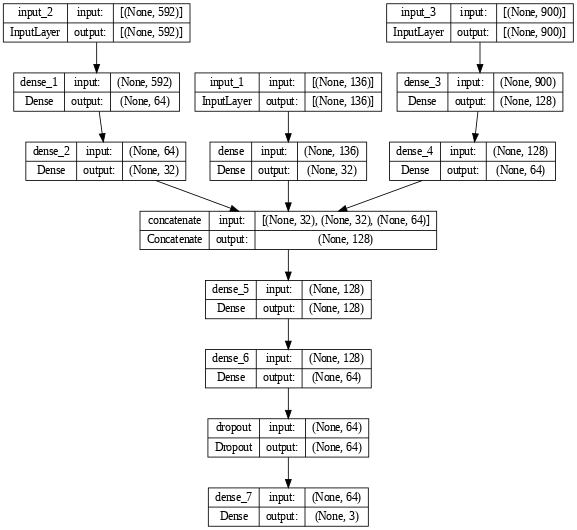

In [ ]:
input1 = Input((x_train1.shape[1],))
input2 = Input((x_train2.shape[1],))
input3 = Input((x_train3.shape[1],))
x1 = input1                               # Ветка 1
x1 = Dense(32, activation="relu")(x1)
x2 = input2                               # Ветка 2
x2 = Dense(64, activation="relu")(x2)
x2 = Dense(32, activation="linear")(x2)
x3 = input3                               # Ветка 3
x3 = Dense(128, activation="relu")(x3)
x3 = Dense(64, activation="linear")(x3)
x = Concatenate()([x1, x2, x3])             # Объединение веток
x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dense(64, activation='linear')(x)       # Промежуточный слой
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)      # Финальный регрессирующий нейрон

model = Model((input1, input2, input3), x)

model.compile(optimizer=Adam(learning_rate=1e-3),
                    # loss="categorical_crossentropy",
                    # loss="sparse_categorical_crossentropy",
                    loss=['mse', 'hinge'],
                    metrics=['accuracy', 'mae']
                    # loss='mse'
                    # metrics=['mae']
                    )
plot_model(model, dpi=60, show_shapes=True)
#model.summary()

In [ ]:

history = model.fit(([x_train1, x_train2, x_train3]), y_train,
                           batch_size=128,
                           epochs=60,
#                           validation_split=0.15,
                           validation_data=(([x_val1, x_val2, x_val3]), y_val),
                    verbose=1)

Epoch 1/60
9/9 [==============================] - 1s 29ms/step - loss: 0.1483 - accuracy: 0.7125 - mae: 0.3343 - val_loss: 0.0541 - val_accuracy: 0.9254 - val_mae: 0.1441
Epoch 2/60
9/9 [==============================] - 0s 9ms/step - loss: 0.0594 - accuracy: 0.9092 - mae: 0.0999 - val_loss: 0.0494 - val_accuracy: 0.9254 - val_mae: 0.0576
Epoch 3/60
9/9 [==============================] - 0s 9ms/step - loss: 0.0600 - accuracy: 0.9092 - mae: 0.0664 - val_loss: 0.0496 - val_accuracy: 0.9254 - val_mae: 0.0519
Epoch 4/60
9/9 [==============================] - 0s 9ms/step - loss: 0.0600 - accuracy: 0.9092 - mae: 0.0629 - val_loss: 0.0496 - val_accuracy: 0.9254 - val_mae: 0.0512
Epoch 5/60
9/9 [==============================] - 0s 11ms/step - loss: 0.0601 - accuracy: 0.9092 - mae: 0.0627 - val_loss: 0.0496 - val_accuracy: 0.9254 - val_mae: 0.0513
Epoch 6/60
9/9 [==============================] - 0s 10ms/step - loss: 0.0596 - accuracy: 0.9092 - mae: 0.0630 - val_loss: 0.0495 - val_accuracy: 0.

In [ ]:
Print_Predict(model, [x_test1, x_test2, x_test3] , y_test)

8/8 [==============================] - 0s 2ms/step
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 0 | Прогноз: НЕВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 2 | Верный класс: 2 | Прогноз: ВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 

8/8 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - mae: 0.0000e+00
Test Loss: 0.000
Test Accuracy: 0.000
8/8 [==============================] - 0s 1ms/step


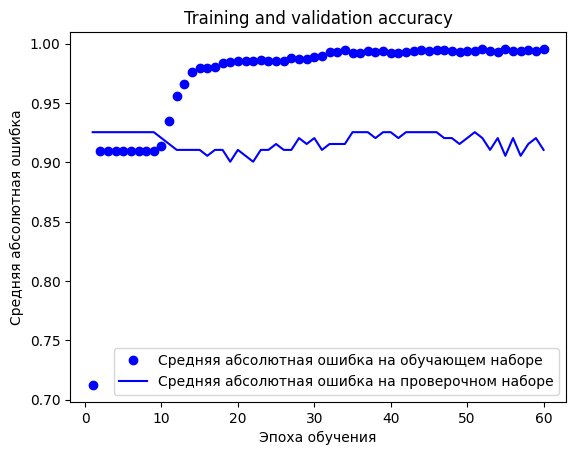

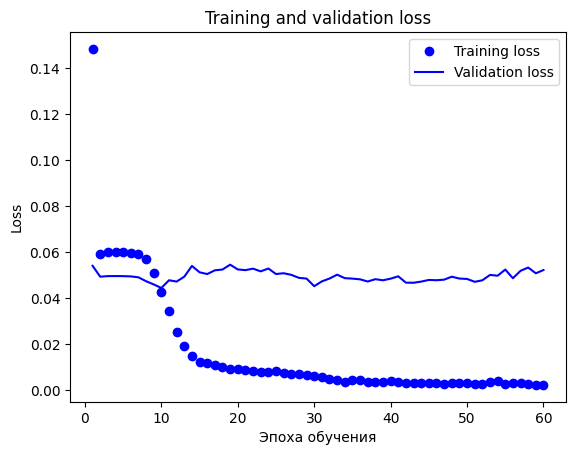

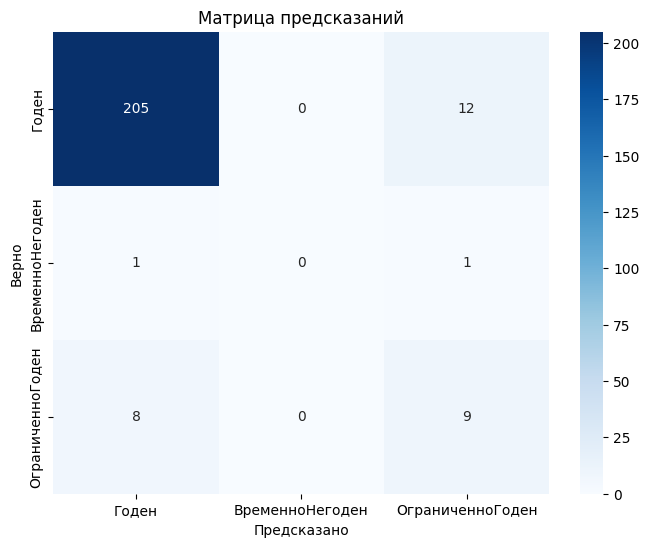

In [ ]:
evaluate_model(model, [x_test1, x_test2, x_test3], y_test)

Epoch 1/20
9/9 [==============================] - 1s 24ms/step - loss: 1.3874 - accuracy: 0.3977 - val_loss: 0.9380 - val_accuracy: 0.8905
Epoch 2/20
9/9 [==============================] - 0s 8ms/step - loss: 1.1120 - accuracy: 0.5106 - val_loss: 0.8565 - val_accuracy: 0.9055
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 0.9463 - accuracy: 0.6005 - val_loss: 0.7982 - val_accuracy: 0.9254
Epoch 4/20
9/9 [==============================] - 0s 9ms/step - loss: 0.8478 - accuracy: 0.6702 - val_loss: 0.7555 - val_accuracy: 0.9303
Epoch 5/20
9/9 [==============================] - 0s 7ms/step - loss: 0.7194 - accuracy: 0.7584 - val_loss: 0.6873 - val_accuracy: 0.9303
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.6300 - accuracy: 0.8025 - val_loss: 0.6288 - val_accuracy: 0.9254
Epoch 7/20
9/9 [==============================] - 0s 9ms/step - loss: 0.5468 - accuracy: 0.8527 - val_loss: 0.5617 - val_accuracy: 0.9254
Epoch 8/20
9/9 [=================

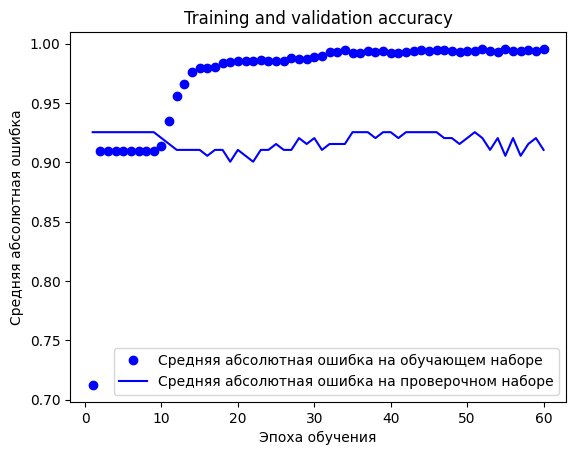

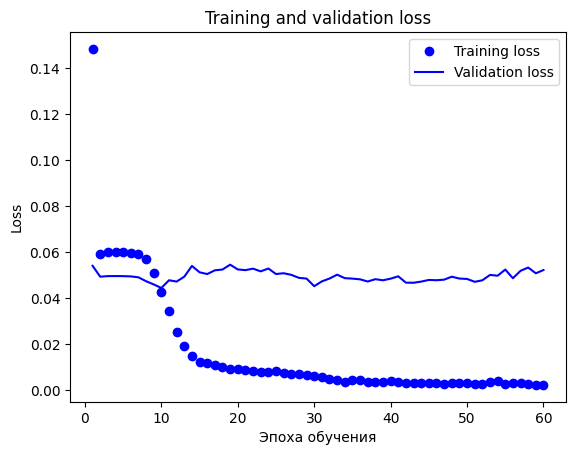

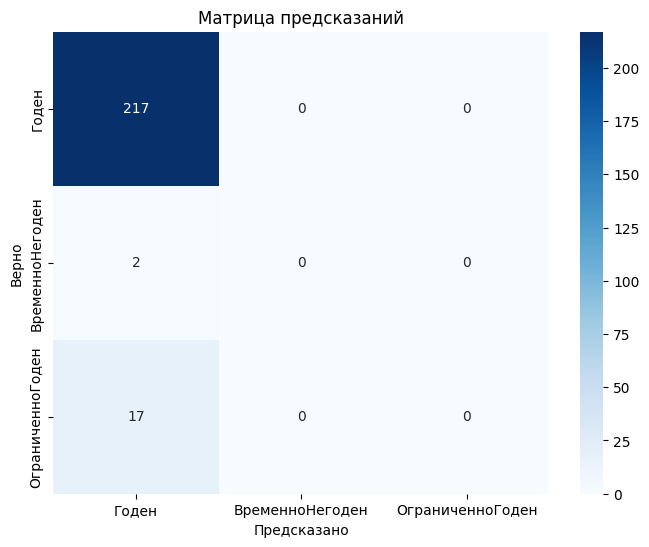

In [ ]:
x_train = np.hstack((x_train1, x_train2, x_train3))
x_val = np.hstack((x_val1, x_val2, x_val3))
x_test = np.hstack((x_test1, x_test2, x_test3))
model1 = Sequential()
model1.add(Dense(100, input_dim=(x_train.shape[1]), activation="relu"))
model1.add(Dropout(0.25))
model1.add(BatchNormalization())
model1.add(Dense(3, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
model1.summary()
Print_Predict(model1, x_test, y_test)
plot_model(model1, dpi=60, show_shapes=True)
evaluate_model(model1, x_test, y_test)


Epoch 1/20
9/9 [==============================] - 1s 21ms/step - loss: 1.3702 - accuracy: 0.3986 - val_loss: 1.0909 - val_accuracy: 0.5224
Epoch 2/20
9/9 [==============================] - 0s 8ms/step - loss: 1.0720 - accuracy: 0.5485 - val_loss: 1.0048 - val_accuracy: 0.7861
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 0.9278 - accuracy: 0.6305 - val_loss: 0.9014 - val_accuracy: 0.8856
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 0.8031 - accuracy: 0.7011 - val_loss: 0.8217 - val_accuracy: 0.9204
Epoch 5/20
9/9 [==============================] - 0s 7ms/step - loss: 0.7004 - accuracy: 0.7654 - val_loss: 0.7418 - val_accuracy: 0.9204
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.5928 - accuracy: 0.8395 - val_loss: 0.6597 - val_accuracy: 0.9204
Epoch 7/20
9/9 [==============================] - 0s 9ms/step - loss: 0.5022 - accuracy: 0.8836 - val_loss: 0.5819 - val_accuracy: 0.9254
Epoch 8/20
9/9 [=================

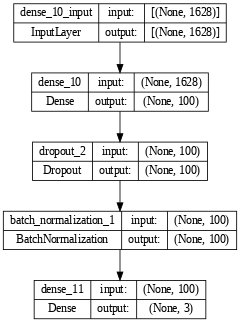

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
model.summary()
plot_model(model, dpi=60, show_shapes=True)

In [ ]:
Print_Predict(model, x_test , y_test)

8/8 [==============================] - 0s 1ms/step
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 1 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный класс: 2 | Прогноз: НЕВЕРНО
 Предсказанный класс: 0 | Верный к

8/8 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test Loss: 0.000
Test Accuracy: 0.000
8/8 [==============================] - 0s 2ms/step


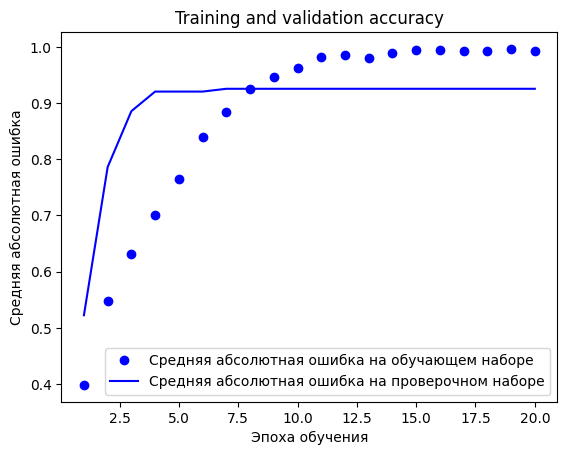

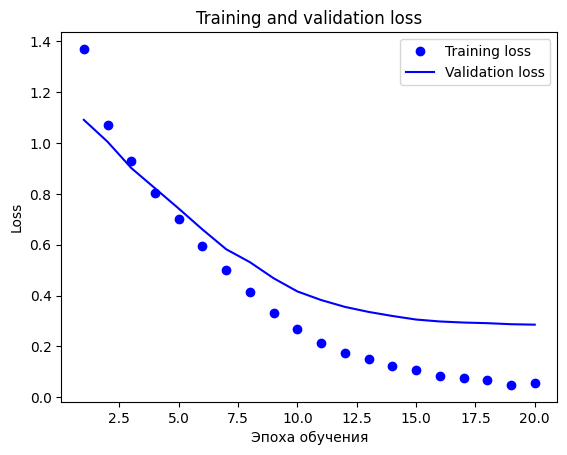

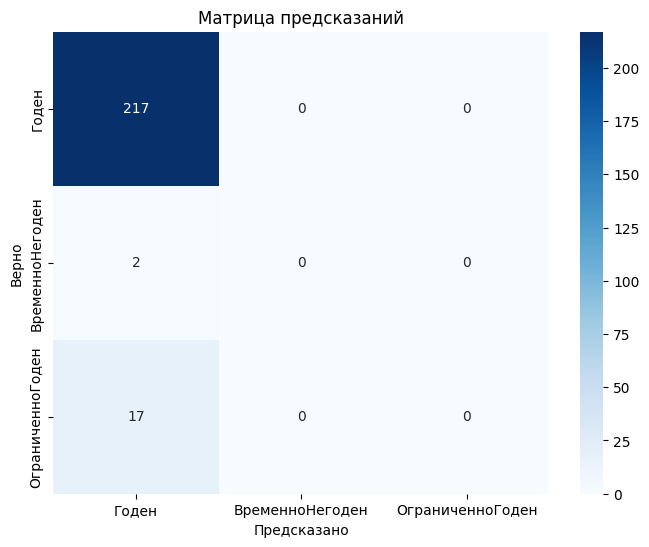

In [ ]:
evaluate_model(model, x_test, y_test)